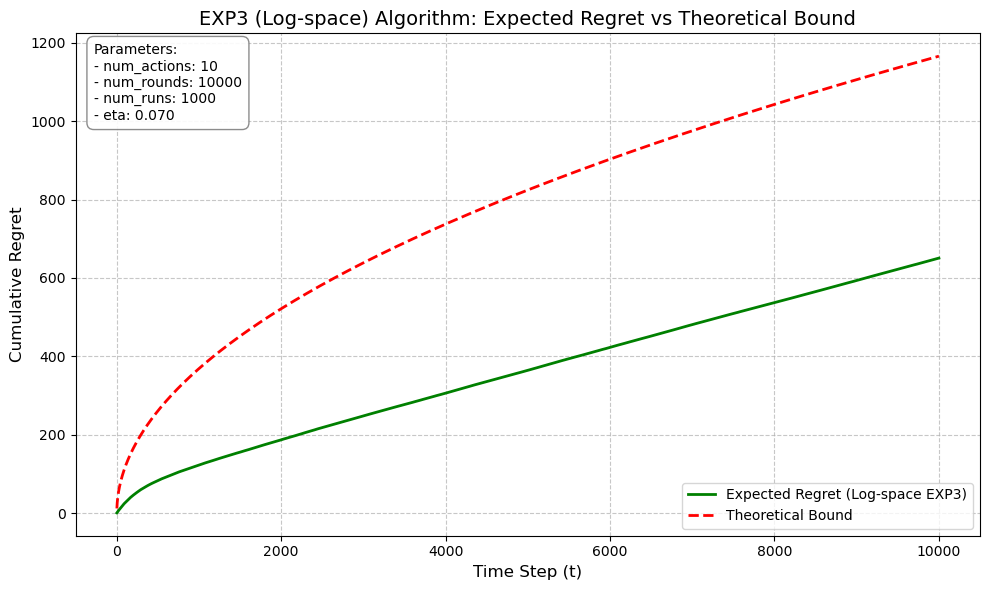

((5, 10),
 array([[1, 0, 0, 0, 1, 0, 0, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]]))

In [23]:
# Re-import necessary modules after code execution state reset
import numpy as np
import matplotlib.pyplot as plt

# Log-space EXP3 algorithm (Type 2 from Lattimore)
def exp3_logspace(num_actions: int, reward_func, eta: float, reward_min: float = 0.0, reward_max: float = 1.0):
    """Generator for the EXP3 algorithm using log-space formulation."""
    S = np.zeros(num_actions, dtype=float)
    t = 0
    while True:
        # Compute softmax probabilities from log-weights
        logits = eta * S
        max_logit = np.max(logits)  # For numerical stability
        exp_logits = np.exp(logits - max_logit)
        prob_dist = exp_logits / np.sum(exp_logits)

        # Draw action and get reward
        choice = np.random.choice(num_actions, p=prob_dist)
        reward = reward_func(choice, t)
        scaled_reward = (reward - reward_min) / (reward_max - reward_min)

        # Loss-based estimate (as in Lattimore's log-space version)
        for i in range(num_actions):
            if i == choice:
                S[i] += 1 - ((1 - scaled_reward) / prob_dist[i])
            else:
                S[i] += 1  # Add default loss of 1

        yield choice, reward, S.copy(), prob_dist.copy()
        t += 1

# Simulation function for log-space EXP3 with reward table extraction
def run_logspace_simulation(num_actions: int, num_rounds: int, eta: float, return_rewards: bool = False):
    biases = 1.0 / np.arange(2, num_actions + 2)
    reward_vector = (np.random.random((num_rounds, num_actions)) < biases).astype(int)
    reward_func = lambda choice, t: reward_vector[t, choice]

    best_action = np.argmax(np.sum(reward_vector, axis=0))
    regrets = np.zeros(num_rounds, dtype=float)
    cumulative_reward = 0.0
    best_action_cumulative_reward = 0.0

    for t, (choice, reward, _, _) in enumerate(exp3_logspace(num_actions, reward_func, eta)):
        cumulative_reward += reward
        best_action_cumulative_reward += reward_vector[t, best_action]
        regrets[t] = best_action_cumulative_reward - cumulative_reward
        if t >= num_rounds - 1:
            break

    if return_rewards:
        return regrets, reward_vector
    return regrets

# Parameters
num_actions = 10
num_rounds = 10000  # reduced for faster execution
num_runs = 1000     # reduced for faster execution
eta = 0.07

# Run simulations and average regret
all_regrets_log = np.array([run_logspace_simulation(num_actions, num_rounds, eta) for _ in range(num_runs)])
expected_regret_log = np.mean(all_regrets_log, axis=0)

# Also extract reward table from one simulation
_, reward_table = run_logspace_simulation(num_actions, num_rounds, eta, return_rewards=True)

# Theoretical regret bound
t_values = np.arange(1, num_rounds + 1)
theoretical_bound = (np.e - 1) * np.sqrt(2 * num_actions * t_values * np.log(num_actions))

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(t_values, expected_regret_log, label='Expected Regret (Log-space EXP3)', color='green', linewidth=2)
plt.plot(t_values, theoretical_bound, label='Theoretical Bound', color='red', linestyle='--', linewidth=2)
plt.xlabel('Time Step (t)', fontsize=12)
plt.ylabel('Cumulative Regret', fontsize=12)
plt.title('EXP3 (Log-space) Algorithm: Expected Regret vs Theoretical Bound', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Parameters box
params = f'Parameters:\n- num_actions: {num_actions}\n- num_rounds: {num_rounds}\n- num_runs: {num_runs}\n- eta: {eta:.3f}'
plt.text(0.02, 0.98, params, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.9))

# Save and close plot
plt.show()


# Print a preview of the reward table
reward_table_preview = reward_table[:5]  # first 5 rounds
reward_table_preview.shape, reward_table_preview


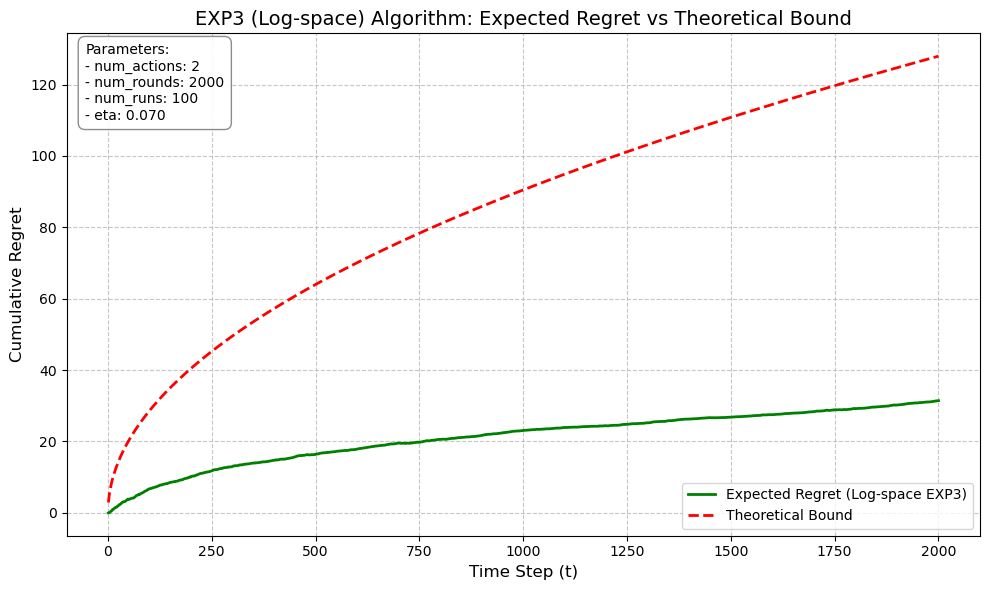

((5, 2),
 array([[0, 0],
        [0, 1],
        [0, 1],
        [0, 0],
        [0, 1]]))

In [21]:
# Re-import necessary modules after code execution state reset
import numpy as np
import matplotlib.pyplot as plt

# Log-space EXP3 algorithm (Type 2 from Lattimore)
def exp3_logspace(num_actions: int, reward_func, eta: float, reward_min: float = 0.0, reward_max: float = 1.0):
    """Generator for the EXP3 algorithm using log-space formulation."""
    S = np.zeros(num_actions, dtype=float)
    t = 0
    while True:
        # Compute softmax probabilities from log-weights
        logits = eta * S
        max_logit = np.max(logits)  # For numerical stability
        exp_logits = np.exp(logits - max_logit)
        prob_dist = exp_logits / np.sum(exp_logits)

        # Draw action and get reward
        choice = np.random.choice(num_actions, p=prob_dist)
        reward = reward_func(choice, t)
        scaled_reward = (reward - reward_min) / (reward_max - reward_min)

        # Loss-based estimate (as in Lattimore's log-space version)
        for i in range(num_actions):
            if i == choice:
                S[i] += 1 - ((1 - scaled_reward) / prob_dist[i])
            else:
                S[i] += 1  # Add default loss of 1

        yield choice, reward, S.copy(), prob_dist.copy()
        t += 1

# Simulation function for log-space EXP3 with reward table extraction
def run_logspace_simulation(num_actions: int, num_rounds: int, eta: float, return_rewards: bool = False):
    biases = 1.0 / np.arange(2, num_actions + 2)
    reward_vector = (np.random.random((num_rounds, num_actions)) < biases).astype(int)
    reward_func = lambda choice, t: reward_vector[t, choice]

    best_action = np.argmax(np.sum(reward_vector, axis=0))
    regrets = np.zeros(num_rounds, dtype=float)
    cumulative_reward = 0.0
    best_action_cumulative_reward = 0.0

    for t, (choice, reward, _, _) in enumerate(exp3_logspace(num_actions, reward_func, eta)):
        cumulative_reward += reward
        best_action_cumulative_reward += reward_vector[t, best_action]
        regrets[t] = best_action_cumulative_reward - cumulative_reward
        if t >= num_rounds - 1:
            break

    if return_rewards:
        return regrets, reward_vector
    return regrets

# Parameters
num_actions = 2
num_rounds = 2000  # reduced for faster execution
num_runs = 100     # reduced for faster execution
eta = 0.07

# Run simulations and average regret
all_regrets_log = np.array([run_logspace_simulation(num_actions, num_rounds, eta) for _ in range(num_runs)])
expected_regret_log = np.mean(all_regrets_log, axis=0)

# Also extract reward table from one simulation
_, reward_table = run_logspace_simulation(num_actions, num_rounds, eta, return_rewards=True)

# Theoretical regret bound
t_values = np.arange(1, num_rounds + 1)
theoretical_bound = (np.e - 1) * np.sqrt(2 * num_actions * t_values * np.log(num_actions))

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(t_values, expected_regret_log, label='Expected Regret (Log-space EXP3)', color='green', linewidth=2)
plt.plot(t_values, theoretical_bound, label='Theoretical Bound', color='red', linestyle='--', linewidth=2)
plt.xlabel('Time Step (t)', fontsize=12)
plt.ylabel('Cumulative Regret', fontsize=12)
plt.title('EXP3 (Log-space) Algorithm: Expected Regret vs Theoretical Bound', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Parameters box
params = f'Parameters:\n- num_actions: {num_actions}\n- num_rounds: {num_rounds}\n- num_runs: {num_runs}\n- eta: {eta:.3f}'
plt.text(0.02, 0.98, params, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.9))

# Save and close plot
plt.show()


# Print a preview of the reward table
reward_table_preview = reward_table[:5]  # first 5 rounds
reward_table_preview.shape, reward_table_preview


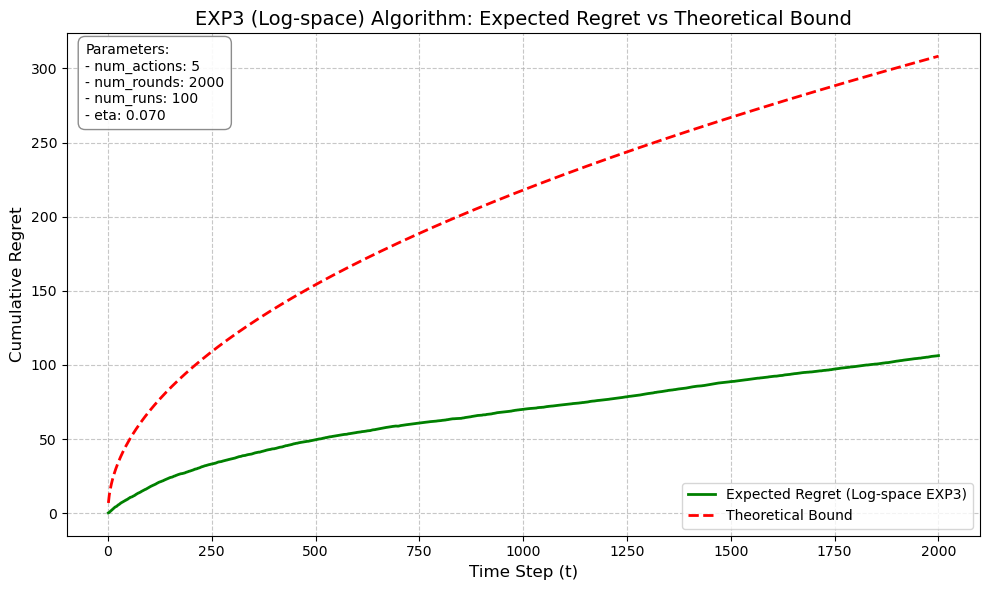

((5, 5),
 array([[1, 0, 0, 0, 1],
        [1, 0, 1, 0, 0],
        [1, 0, 1, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 1, 0, 1]]))

In [22]:
# Re-import necessary modules after code execution state reset
import numpy as np
import matplotlib.pyplot as plt

# Log-space EXP3 algorithm (Type 2 from Lattimore)
def exp3_logspace(num_actions: int, reward_func, eta: float, reward_min: float = 0.0, reward_max: float = 1.0):
    """Generator for the EXP3 algorithm using log-space formulation."""
    S = np.zeros(num_actions, dtype=float)
    t = 0
    while True:
        # Compute softmax probabilities from log-weights
        logits = eta * S
        max_logit = np.max(logits)  # For numerical stability
        exp_logits = np.exp(logits - max_logit)
        prob_dist = exp_logits / np.sum(exp_logits)

        # Draw action and get reward
        choice = np.random.choice(num_actions, p=prob_dist)
        reward = reward_func(choice, t)
        scaled_reward = (reward - reward_min) / (reward_max - reward_min)

        # Loss-based estimate (as in Lattimore's log-space version)
        for i in range(num_actions):
            if i == choice:
                S[i] += 1 - ((1 - scaled_reward) / prob_dist[i])
            else:
                S[i] += 1  # Add default loss of 1

        yield choice, reward, S.copy(), prob_dist.copy()
        t += 1

# Simulation function for log-space EXP3 with reward table extraction
def run_logspace_simulation(num_actions: int, num_rounds: int, eta: float, return_rewards: bool = False):
    biases = 1.0 / np.arange(2, num_actions + 2)
    reward_vector = (np.random.random((num_rounds, num_actions)) < biases).astype(int)
    reward_func = lambda choice, t: reward_vector[t, choice]

    best_action = np.argmax(np.sum(reward_vector, axis=0))
    regrets = np.zeros(num_rounds, dtype=float)
    cumulative_reward = 0.0
    best_action_cumulative_reward = 0.0

    for t, (choice, reward, _, _) in enumerate(exp3_logspace(num_actions, reward_func, eta)):
        cumulative_reward += reward
        best_action_cumulative_reward += reward_vector[t, best_action]
        regrets[t] = best_action_cumulative_reward - cumulative_reward
        if t >= num_rounds - 1:
            break

    if return_rewards:
        return regrets, reward_vector
    return regrets

# Parameters
num_actions = 5
num_rounds = 2000  # reduced for faster execution
num_runs = 100     # reduced for faster execution
eta = 0.07

# Run simulations and average regret
all_regrets_log = np.array([run_logspace_simulation(num_actions, num_rounds, eta) for _ in range(num_runs)])
expected_regret_log = np.mean(all_regrets_log, axis=0)

# Also extract reward table from one simulation
_, reward_table = run_logspace_simulation(num_actions, num_rounds, eta, return_rewards=True)

# Theoretical regret bound
t_values = np.arange(1, num_rounds + 1)
theoretical_bound = (np.e - 1) * np.sqrt(2 * num_actions * t_values * np.log(num_actions))

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(t_values, expected_regret_log, label='Expected Regret (Log-space EXP3)', color='green', linewidth=2)
plt.plot(t_values, theoretical_bound, label='Theoretical Bound', color='red', linestyle='--', linewidth=2)
plt.xlabel('Time Step (t)', fontsize=12)
plt.ylabel('Cumulative Regret', fontsize=12)
plt.title('EXP3 (Log-space) Algorithm: Expected Regret vs Theoretical Bound', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Parameters box
params = f'Parameters:\n- num_actions: {num_actions}\n- num_rounds: {num_rounds}\n- num_runs: {num_runs}\n- eta: {eta:.3f}'
plt.text(0.02, 0.98, params, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.9))

# Save and close plot
plt.show()


# Print a preview of the reward table
reward_table_preview = reward_table[:5]  # first 5 rounds
reward_table_preview.shape, reward_table_preview


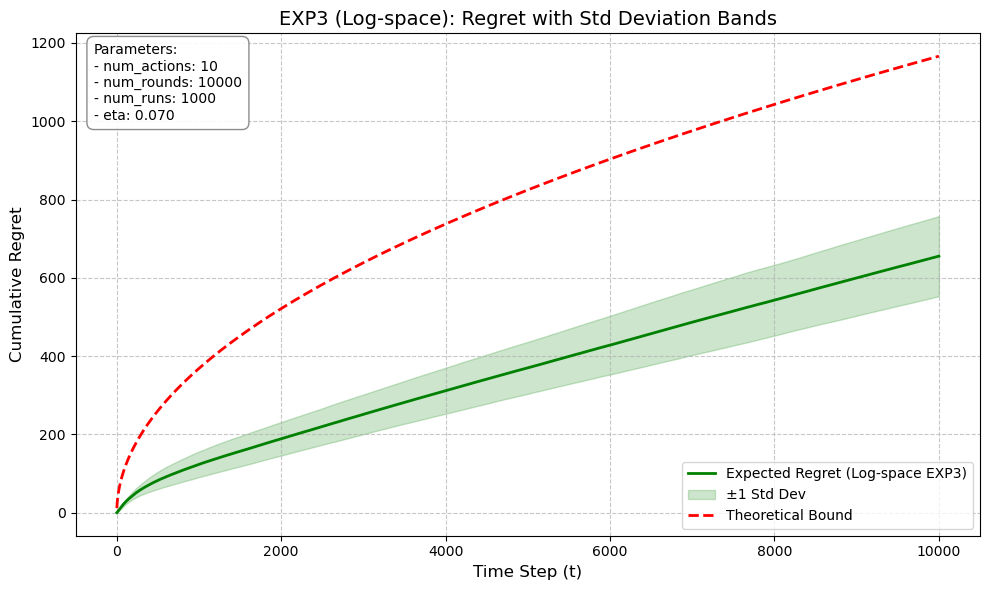

In [26]:
# Re-import modules after kernel reset
import numpy as np
import matplotlib.pyplot as plt

# Regenerate reward data and run simulations since kernel reset
def exp3_logspace(num_actions: int, reward_func, eta: float, reward_min: float = 0.0, reward_max: float = 1.0):
    S = np.zeros(num_actions, dtype=float)
    t = 0
    while True:
        logits = eta * S
        max_logit = np.max(logits)
        exp_logits = np.exp(logits - max_logit)
        prob_dist = exp_logits / np.sum(exp_logits)

        choice = np.random.choice(num_actions, p=prob_dist)
        reward = reward_func(choice, t)
        scaled_reward = (reward - reward_min) / (reward_max - reward_min)

        for i in range(num_actions):
            if i == choice:
                S[i] += 1 - ((1 - scaled_reward) / prob_dist[i])
            else:
                S[i] += 1

        yield choice, reward, S.copy(), prob_dist.copy()
        t += 1

def run_logspace_simulation(num_actions: int, num_rounds: int, eta: float, return_rewards: bool = False):
    biases = 1.0 / np.arange(2, num_actions + 2)
    reward_vector = (np.random.random((num_rounds, num_actions)) < biases).astype(int)
    reward_func = lambda choice, t: reward_vector[t, choice]

    best_action = np.argmax(np.sum(reward_vector, axis=0))
    regrets = np.zeros(num_rounds, dtype=float)
    cumulative_reward = 0.0
    best_action_cumulative_reward = 0.0

    for t, (choice, reward, _, _) in enumerate(exp3_logspace(num_actions, reward_func, eta)):
        cumulative_reward += reward
        best_action_cumulative_reward += reward_vector[t, best_action]
        regrets[t] = best_action_cumulative_reward - cumulative_reward
        if t >= num_rounds - 1:
            break

    if return_rewards:
        return regrets, reward_vector
    return regrets

# Parameters
num_actions = 10
num_rounds = 10000
num_runs = 1000
eta = 0.07

# Run simulations
all_regrets_log = np.array([run_logspace_simulation(num_actions, num_rounds, eta) for _ in range(num_runs)])
expected_regret_log = np.mean(all_regrets_log, axis=0)
std_dev_regret = np.std(all_regrets_log, axis=0)
t_values = np.arange(1, num_rounds + 1)
theoretical_bound = (np.e - 1) * np.sqrt(2 * num_actions * t_values * np.log(num_actions))

# Plot with error bands (mean ± std deviation)
plt.figure(figsize=(10, 6))
plt.plot(t_values, expected_regret_log, label='Expected Regret (Log-space EXP3)', color='green', linewidth=2)
plt.fill_between(t_values,
                 expected_regret_log - std_dev_regret,
                 expected_regret_log + std_dev_regret,
                 color='green', alpha=0.2, label='±1 Std Dev')
plt.plot(t_values, theoretical_bound, label='Theoretical Bound', color='red', linestyle='--', linewidth=2)
plt.xlabel('Time Step (t)', fontsize=12)
plt.ylabel('Cumulative Regret', fontsize=12)
plt.title('EXP3 (Log-space): Regret with Std Deviation Bands', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Parameters box
params = f'Parameters:\n- num_actions: {num_actions}\n- num_rounds: {num_rounds}\n- num_runs: {num_runs}\n- eta: {eta:.3f}'
plt.text(0.02, 0.98, params, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.9))

# Save and close
plt.show()



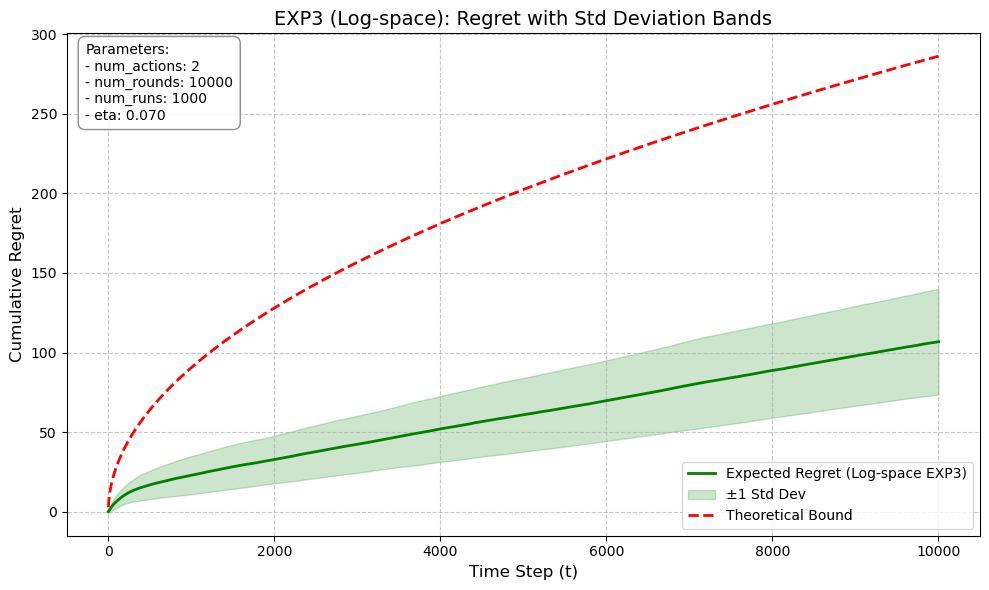

In [27]:
# Re-import modules after kernel reset
import numpy as np
import matplotlib.pyplot as plt

# Regenerate reward data and run simulations since kernel reset
def exp3_logspace(num_actions: int, reward_func, eta: float, reward_min: float = 0.0, reward_max: float = 1.0):
    S = np.zeros(num_actions, dtype=float)
    t = 0
    while True:
        logits = eta * S
        max_logit = np.max(logits)
        exp_logits = np.exp(logits - max_logit)
        prob_dist = exp_logits / np.sum(exp_logits)

        choice = np.random.choice(num_actions, p=prob_dist)
        reward = reward_func(choice, t)
        scaled_reward = (reward - reward_min) / (reward_max - reward_min)

        for i in range(num_actions):
            if i == choice:
                S[i] += 1 - ((1 - scaled_reward) / prob_dist[i])
            else:
                S[i] += 1

        yield choice, reward, S.copy(), prob_dist.copy()
        t += 1

def run_logspace_simulation(num_actions: int, num_rounds: int, eta: float, return_rewards: bool = False):
    biases = 1.0 / np.arange(2, num_actions + 2)
    reward_vector = (np.random.random((num_rounds, num_actions)) < biases).astype(int)
    reward_func = lambda choice, t: reward_vector[t, choice]

    best_action = np.argmax(np.sum(reward_vector, axis=0))
    regrets = np.zeros(num_rounds, dtype=float)
    cumulative_reward = 0.0
    best_action_cumulative_reward = 0.0

    for t, (choice, reward, _, _) in enumerate(exp3_logspace(num_actions, reward_func, eta)):
        cumulative_reward += reward
        best_action_cumulative_reward += reward_vector[t, best_action]
        regrets[t] = best_action_cumulative_reward - cumulative_reward
        if t >= num_rounds - 1:
            break

    if return_rewards:
        return regrets, reward_vector
    return regrets

# Parameters
num_actions = 2
num_rounds = 10000
num_runs = 1000
eta = 0.07

# Run simulations
all_regrets_log = np.array([run_logspace_simulation(num_actions, num_rounds, eta) for _ in range(num_runs)])
expected_regret_log = np.mean(all_regrets_log, axis=0)
std_dev_regret = np.std(all_regrets_log, axis=0)
t_values = np.arange(1, num_rounds + 1)
theoretical_bound = (np.e - 1) * np.sqrt(2 * num_actions * t_values * np.log(num_actions))

# Plot with error bands (mean ± std deviation)
plt.figure(figsize=(10, 6))
plt.plot(t_values, expected_regret_log, label='Expected Regret (Log-space EXP3)', color='green', linewidth=2)
plt.fill_between(t_values,
                 expected_regret_log - std_dev_regret,
                 expected_regret_log + std_dev_regret,
                 color='green', alpha=0.2, label='±1 Std Dev')
plt.plot(t_values, theoretical_bound, label='Theoretical Bound', color='red', linestyle='--', linewidth=2)
plt.xlabel('Time Step (t)', fontsize=12)
plt.ylabel('Cumulative Regret', fontsize=12)
plt.title('EXP3 (Log-space): Regret with Std Deviation Bands', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Parameters box
params = f'Parameters:\n- num_actions: {num_actions}\n- num_rounds: {num_rounds}\n- num_runs: {num_runs}\n- eta: {eta:.3f}'
plt.text(0.02, 0.98, params, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.9))

# Save and close
plt.show()



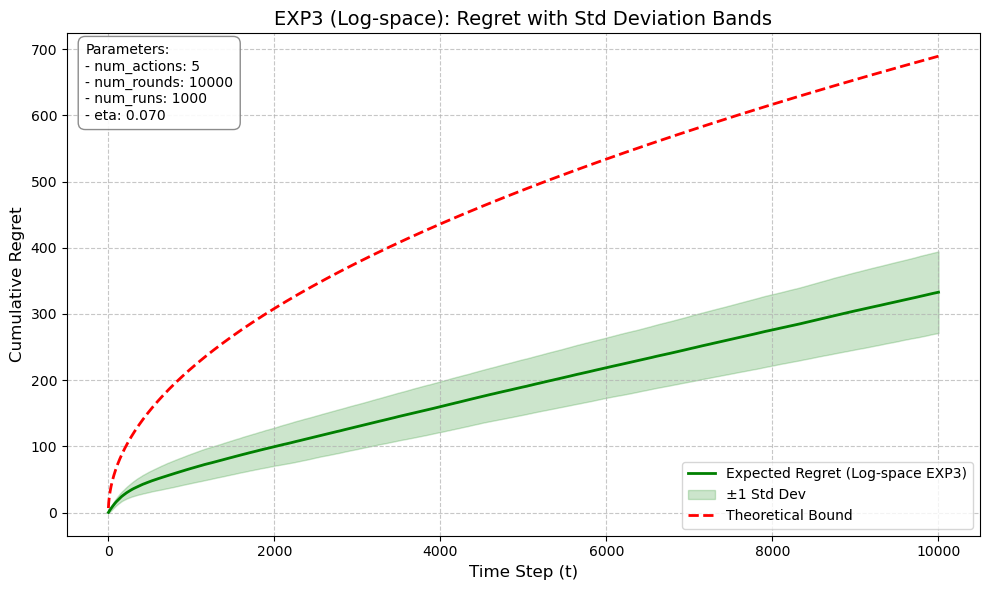

In [28]:
# Re-import modules after kernel reset
import numpy as np
import matplotlib.pyplot as plt

# Regenerate reward data and run simulations since kernel reset
def exp3_logspace(num_actions: int, reward_func, eta: float, reward_min: float = 0.0, reward_max: float = 1.0):
    S = np.zeros(num_actions, dtype=float)
    t = 0
    while True:
        logits = eta * S
        max_logit = np.max(logits)
        exp_logits = np.exp(logits - max_logit)
        prob_dist = exp_logits / np.sum(exp_logits)

        choice = np.random.choice(num_actions, p=prob_dist)
        reward = reward_func(choice, t)
        scaled_reward = (reward - reward_min) / (reward_max - reward_min)

        for i in range(num_actions):
            if i == choice:
                S[i] += 1 - ((1 - scaled_reward) / prob_dist[i])
            else:
                S[i] += 1

        yield choice, reward, S.copy(), prob_dist.copy()
        t += 1

def run_logspace_simulation(num_actions: int, num_rounds: int, eta: float, return_rewards: bool = False):
    biases = 1.0 / np.arange(2, num_actions + 2)
    reward_vector = (np.random.random((num_rounds, num_actions)) < biases).astype(int)
    reward_func = lambda choice, t: reward_vector[t, choice]

    best_action = np.argmax(np.sum(reward_vector, axis=0))
    regrets = np.zeros(num_rounds, dtype=float)
    cumulative_reward = 0.0
    best_action_cumulative_reward = 0.0

    for t, (choice, reward, _, _) in enumerate(exp3_logspace(num_actions, reward_func, eta)):
        cumulative_reward += reward
        best_action_cumulative_reward += reward_vector[t, best_action]
        regrets[t] = best_action_cumulative_reward - cumulative_reward
        if t >= num_rounds - 1:
            break

    if return_rewards:
        return regrets, reward_vector
    return regrets

# Parameters
num_actions = 5
num_rounds = 10000
num_runs = 1000
eta = 0.07

# Run simulations
all_regrets_log = np.array([run_logspace_simulation(num_actions, num_rounds, eta) for _ in range(num_runs)])
expected_regret_log = np.mean(all_regrets_log, axis=0)
std_dev_regret = np.std(all_regrets_log, axis=0)
t_values = np.arange(1, num_rounds + 1)
theoretical_bound = (np.e - 1) * np.sqrt(2 * num_actions * t_values * np.log(num_actions))

# Plot with error bands (mean ± std deviation)
plt.figure(figsize=(10, 6))
plt.plot(t_values, expected_regret_log, label='Expected Regret (Log-space EXP3)', color='green', linewidth=2)
plt.fill_between(t_values,
                 expected_regret_log - std_dev_regret,
                 expected_regret_log + std_dev_regret,
                 color='green', alpha=0.2, label='±1 Std Dev')
plt.plot(t_values, theoretical_bound, label='Theoretical Bound', color='red', linestyle='--', linewidth=2)
plt.xlabel('Time Step (t)', fontsize=12)
plt.ylabel('Cumulative Regret', fontsize=12)
plt.title('EXP3 (Log-space): Regret with Std Deviation Bands', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Parameters box
params = f'Parameters:\n- num_actions: {num_actions}\n- num_rounds: {num_rounds}\n- num_runs: {num_runs}\n- eta: {eta:.3f}'
plt.text(0.02, 0.98, params, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.9))

# Save and close
plt.show()



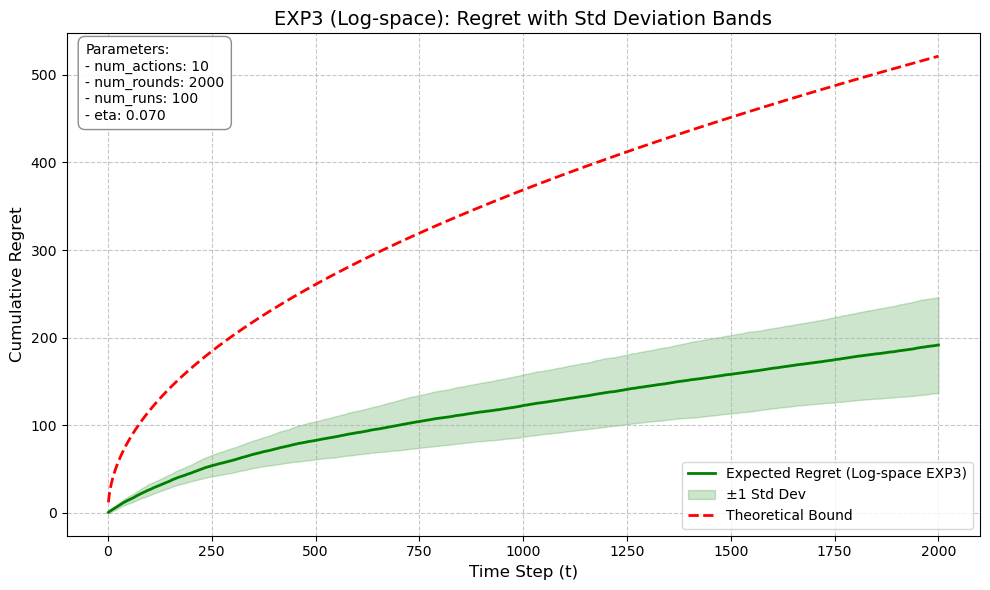

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 1, 0]])

In [30]:
# Re-import modules after kernel reset
import numpy as np
import matplotlib.pyplot as plt

# Regenerate reward data and run simulations since kernel reset
def exp3_logspace(num_actions: int, reward_func, eta: float, reward_min: float = 0.0, reward_max: float = 1.0):
    S = np.zeros(num_actions, dtype=float)
    t = 0
    while True:
        logits = eta * S
        max_logit = np.max(logits)
        exp_logits = np.exp(logits - max_logit)
        prob_dist = exp_logits / np.sum(exp_logits)

        choice = np.random.choice(num_actions, p=prob_dist)
        reward = reward_func(choice, t)
        scaled_reward = (reward - reward_min) / (reward_max - reward_min)

        for i in range(num_actions):
            if i == choice:
                S[i] += 1 - ((1 - scaled_reward) / prob_dist[i])
            else:
                S[i] += 1

        yield choice, reward, S.copy(), prob_dist.copy()
        t += 1

# Re-run the simulation and capture reward_table along with regrets
def run_logspace_simulation_with_rewards(num_actions: int, num_rounds: int, eta: float):
    biases = 1.0 / np.arange(2, num_actions + 2)
    reward_vector = (np.random.random((num_rounds, num_actions)) < biases).astype(int)
    reward_func = lambda choice, t: reward_vector[t, choice]

    best_action = np.argmax(np.sum(reward_vector, axis=0))
    regrets = np.zeros(num_rounds, dtype=float)
    cumulative_reward = 0.0
    best_action_cumulative_reward = 0.0

    for t, (choice, reward, _, _) in enumerate(exp3_logspace(num_actions, reward_func, eta)):
        cumulative_reward += reward
        best_action_cumulative_reward += reward_vector[t, best_action]
        regrets[t] = best_action_cumulative_reward - cumulative_reward
        if t >= num_rounds - 1:
            break

    return regrets, reward_vector

# Parameters
num_actions = 10
num_rounds = 2000
num_runs = 100
eta = 0.07

# Run multiple simulations
all_regrets_log = []
reward_table_sample = None

for run in range(num_runs):
    regrets, reward_table = run_logspace_simulation_with_rewards(num_actions, num_rounds, eta)
    all_regrets_log.append(regrets)
    if run == 0:
        reward_table_sample = reward_table  # Save the first run's reward table

# Convert regrets to NumPy array
all_regrets_log = np.array(all_regrets_log)
expected_regret_log = np.mean(all_regrets_log, axis=0)
std_dev_regret = np.std(all_regrets_log, axis=0)
t_values = np.arange(1, num_rounds + 1)
theoretical_bound = (np.e - 1) * np.sqrt(2 * num_actions * t_values * np.log(num_actions))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_values, expected_regret_log, label='Expected Regret (Log-space EXP3)', color='green', linewidth=2)
plt.fill_between(t_values,
                 expected_regret_log - std_dev_regret,
                 expected_regret_log + std_dev_regret,
                 color='green', alpha=0.2, label='±1 Std Dev')
plt.plot(t_values, theoretical_bound, label='Theoretical Bound', color='red', linestyle='--', linewidth=2)
plt.xlabel('Time Step (t)', fontsize=12)
plt.ylabel('Cumulative Regret', fontsize=12)
plt.title('EXP3 (Log-space): Regret with Std Deviation Bands', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

params = f'Parameters:\n- num_actions: {num_actions}\n- num_rounds: {num_rounds}\n- num_runs: {num_runs}\n- eta: {eta:.3f}'
plt.text(0.02, 0.98, params, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.9))

# Save and display reward table preview
plt.show()

# Show first 5 rows of the reward table
reward_table_sample[:5]


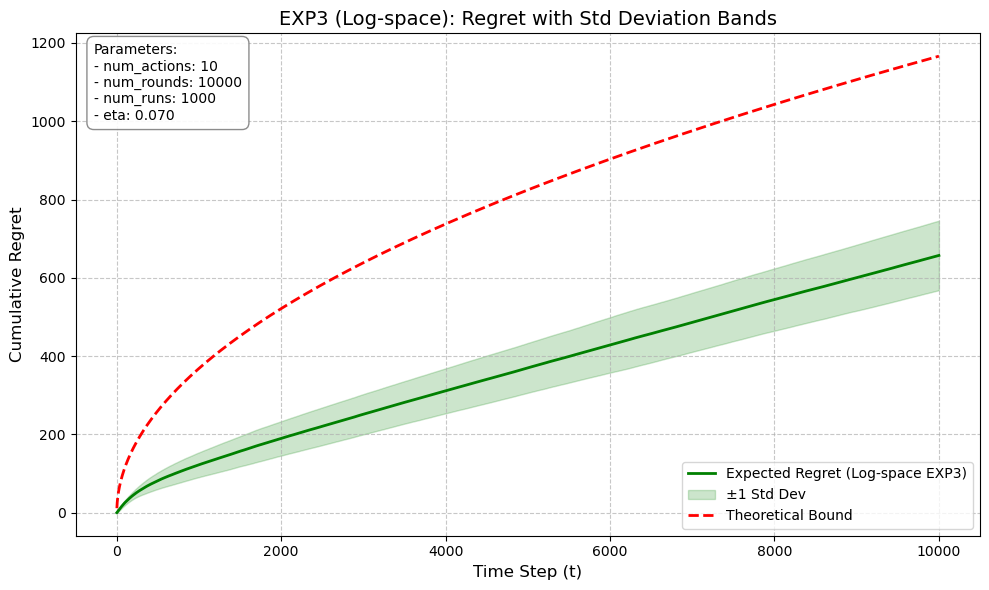

array([[0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 0]])

In [31]:
# Re-import modules after kernel reset
import numpy as np
import matplotlib.pyplot as plt

# Regenerate reward data and run simulations since kernel reset
def exp3_logspace(num_actions: int, reward_func, eta: float, reward_min: float = 0.0, reward_max: float = 1.0):
    S = np.zeros(num_actions, dtype=float)
    t = 0
    while True:
        logits = eta * S
        max_logit = np.max(logits)
        exp_logits = np.exp(logits - max_logit)
        prob_dist = exp_logits / np.sum(exp_logits)

        choice = np.random.choice(num_actions, p=prob_dist)
        reward = reward_func(choice, t)
        scaled_reward = (reward - reward_min) / (reward_max - reward_min)

        for i in range(num_actions):
            if i == choice:
                S[i] += 1 - ((1 - scaled_reward) / prob_dist[i])
            else:
                S[i] += 1

        yield choice, reward, S.copy(), prob_dist.copy()
        t += 1

# Re-run the simulation and capture reward_table along with regrets
def run_logspace_simulation_with_rewards(num_actions: int, num_rounds: int, eta: float):
    biases = 1.0 / np.arange(2, num_actions + 2)
    reward_vector = (np.random.random((num_rounds, num_actions)) < biases).astype(int)
    reward_func = lambda choice, t: reward_vector[t, choice]

    best_action = np.argmax(np.sum(reward_vector, axis=0))
    regrets = np.zeros(num_rounds, dtype=float)
    cumulative_reward = 0.0
    best_action_cumulative_reward = 0.0

    for t, (choice, reward, _, _) in enumerate(exp3_logspace(num_actions, reward_func, eta)):
        cumulative_reward += reward
        best_action_cumulative_reward += reward_vector[t, best_action]
        regrets[t] = best_action_cumulative_reward - cumulative_reward
        if t >= num_rounds - 1:
            break

    return regrets, reward_vector

# Parameters
num_actions = 10
num_rounds = 10000
num_runs = 1000
eta = 0.07

# Run multiple simulations
all_regrets_log = []
reward_table_sample = None

for run in range(num_runs):
    regrets, reward_table = run_logspace_simulation_with_rewards(num_actions, num_rounds, eta)
    all_regrets_log.append(regrets)
    if run == 0:
        reward_table_sample = reward_table  # Save the first run's reward table

# Convert regrets to NumPy array
all_regrets_log = np.array(all_regrets_log)
expected_regret_log = np.mean(all_regrets_log, axis=0)
std_dev_regret = np.std(all_regrets_log, axis=0)
t_values = np.arange(1, num_rounds + 1)
theoretical_bound = (np.e - 1) * np.sqrt(2 * num_actions * t_values * np.log(num_actions))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_values, expected_regret_log, label='Expected Regret (Log-space EXP3)', color='green', linewidth=2)
plt.fill_between(t_values,
                 expected_regret_log - std_dev_regret,
                 expected_regret_log + std_dev_regret,
                 color='green', alpha=0.2, label='±1 Std Dev')
plt.plot(t_values, theoretical_bound, label='Theoretical Bound', color='red', linestyle='--', linewidth=2)
plt.xlabel('Time Step (t)', fontsize=12)
plt.ylabel('Cumulative Regret', fontsize=12)
plt.title('EXP3 (Log-space): Regret with Std Deviation Bands', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

params = f'Parameters:\n- num_actions: {num_actions}\n- num_rounds: {num_rounds}\n- num_runs: {num_runs}\n- eta: {eta:.3f}'
plt.text(0.02, 0.98, params, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.9))

# Save and display reward table preview
plt.show()

# Show first 5 rows of the reward table
reward_table_sample[:5]


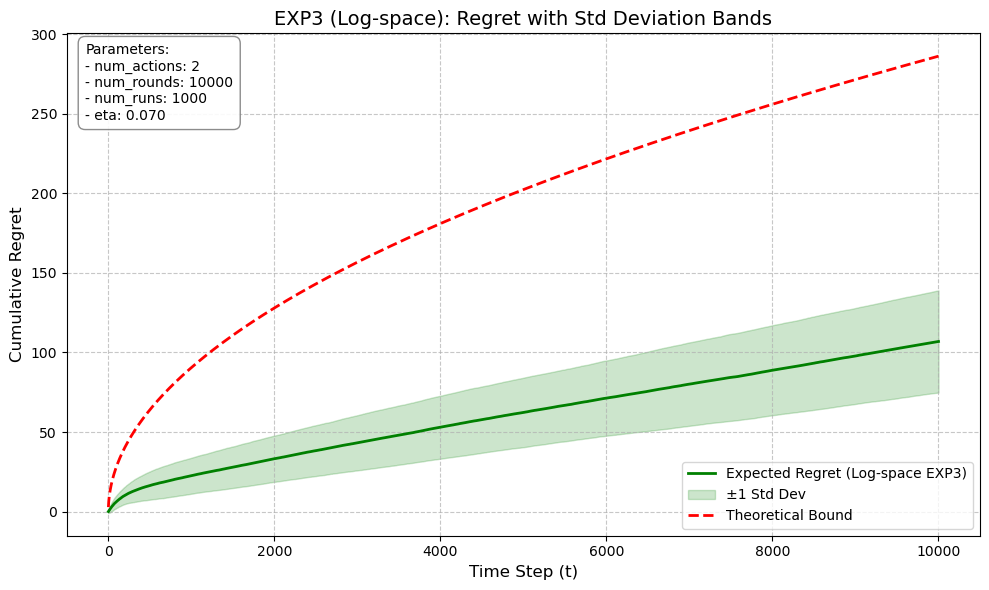

array([[0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 0]])

In [32]:
# Re-import modules after kernel reset
import numpy as np
import matplotlib.pyplot as plt

# Regenerate reward data and run simulations since kernel reset
def exp3_logspace(num_actions: int, reward_func, eta: float, reward_min: float = 0.0, reward_max: float = 1.0):
    S = np.zeros(num_actions, dtype=float)
    t = 0
    while True:
        logits = eta * S
        max_logit = np.max(logits)
        exp_logits = np.exp(logits - max_logit)
        prob_dist = exp_logits / np.sum(exp_logits)

        choice = np.random.choice(num_actions, p=prob_dist)
        reward = reward_func(choice, t)
        scaled_reward = (reward - reward_min) / (reward_max - reward_min)

        for i in range(num_actions):
            if i == choice:
                S[i] += 1 - ((1 - scaled_reward) / prob_dist[i])
            else:
                S[i] += 1

        yield choice, reward, S.copy(), prob_dist.copy()
        t += 1

# Re-run the simulation and capture reward_table along with regrets
def run_logspace_simulation_with_rewards(num_actions: int, num_rounds: int, eta: float):
    biases = 1.0 / np.arange(2, num_actions + 2)
    reward_vector = (np.random.random((num_rounds, num_actions)) < biases).astype(int)
    reward_func = lambda choice, t: reward_vector[t, choice]

    best_action = np.argmax(np.sum(reward_vector, axis=0))
    regrets = np.zeros(num_rounds, dtype=float)
    cumulative_reward = 0.0
    best_action_cumulative_reward = 0.0

    for t, (choice, reward, _, _) in enumerate(exp3_logspace(num_actions, reward_func, eta)):
        cumulative_reward += reward
        best_action_cumulative_reward += reward_vector[t, best_action]
        regrets[t] = best_action_cumulative_reward - cumulative_reward
        if t >= num_rounds - 1:
            break

    return regrets, reward_vector

# Parameters
num_actions = 2
num_rounds = 10000
num_runs = 1000
eta = 0.07

# Run multiple simulations
all_regrets_log = []
reward_table_sample = None

for run in range(num_runs):
    regrets, reward_table = run_logspace_simulation_with_rewards(num_actions, num_rounds, eta)
    all_regrets_log.append(regrets)
    if run == 0:
        reward_table_sample = reward_table  # Save the first run's reward table

# Convert regrets to NumPy array
all_regrets_log = np.array(all_regrets_log)
expected_regret_log = np.mean(all_regrets_log, axis=0)
std_dev_regret = np.std(all_regrets_log, axis=0)
t_values = np.arange(1, num_rounds + 1)
theoretical_bound = (np.e - 1) * np.sqrt(2 * num_actions * t_values * np.log(num_actions))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_values, expected_regret_log, label='Expected Regret (Log-space EXP3)', color='green', linewidth=2)
plt.fill_between(t_values,
                 expected_regret_log - std_dev_regret,
                 expected_regret_log + std_dev_regret,
                 color='green', alpha=0.2, label='±1 Std Dev')
plt.plot(t_values, theoretical_bound, label='Theoretical Bound', color='red', linestyle='--', linewidth=2)
plt.xlabel('Time Step (t)', fontsize=12)
plt.ylabel('Cumulative Regret', fontsize=12)
plt.title('EXP3 (Log-space): Regret with Std Deviation Bands', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

params = f'Parameters:\n- num_actions: {num_actions}\n- num_rounds: {num_rounds}\n- num_runs: {num_runs}\n- eta: {eta:.3f}'
plt.text(0.02, 0.98, params, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.9))

# Save and display reward table preview
plt.show()

# Show first 5 rows of the reward table
reward_table_sample[:5]


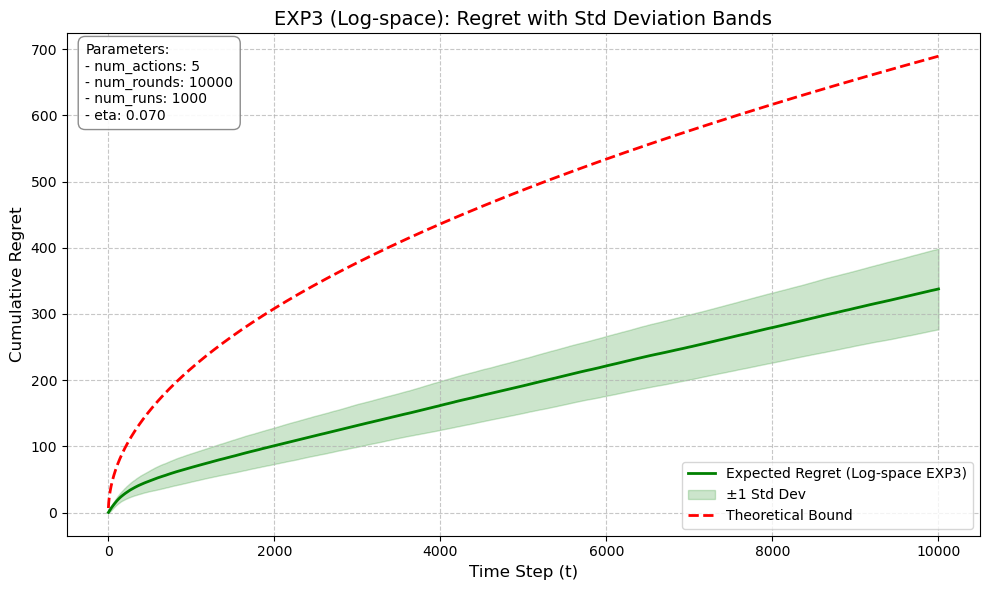

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 1, 1, 0],
       [0, 0, 1, 0, 1],
       [0, 1, 0, 0, 0]])

In [33]:
# Re-import modules after kernel reset
import numpy as np
import matplotlib.pyplot as plt

# Regenerate reward data and run simulations since kernel reset
def exp3_logspace(num_actions: int, reward_func, eta: float, reward_min: float = 0.0, reward_max: float = 1.0):
    S = np.zeros(num_actions, dtype=float)
    t = 0
    while True:
        logits = eta * S
        max_logit = np.max(logits)
        exp_logits = np.exp(logits - max_logit)
        prob_dist = exp_logits / np.sum(exp_logits)

        choice = np.random.choice(num_actions, p=prob_dist)
        reward = reward_func(choice, t)
        scaled_reward = (reward - reward_min) / (reward_max - reward_min)

        for i in range(num_actions):
            if i == choice:
                S[i] += 1 - ((1 - scaled_reward) / prob_dist[i])
            else:
                S[i] += 1

        yield choice, reward, S.copy(), prob_dist.copy()
        t += 1

# Re-run the simulation and capture reward_table along with regrets
def run_logspace_simulation_with_rewards(num_actions: int, num_rounds: int, eta: float):
    biases = 1.0 / np.arange(2, num_actions + 2)
    reward_vector = (np.random.random((num_rounds, num_actions)) < biases).astype(int)
    reward_func = lambda choice, t: reward_vector[t, choice]

    best_action = np.argmax(np.sum(reward_vector, axis=0))
    regrets = np.zeros(num_rounds, dtype=float)
    cumulative_reward = 0.0
    best_action_cumulative_reward = 0.0

    for t, (choice, reward, _, _) in enumerate(exp3_logspace(num_actions, reward_func, eta)):
        cumulative_reward += reward
        best_action_cumulative_reward += reward_vector[t, best_action]
        regrets[t] = best_action_cumulative_reward - cumulative_reward
        if t >= num_rounds - 1:
            break

    return regrets, reward_vector

# Parameters
num_actions = 5
num_rounds = 10000
num_runs = 1000
eta = 0.07

# Run multiple simulations
all_regrets_log = []
reward_table_sample = None

for run in range(num_runs):
    regrets, reward_table = run_logspace_simulation_with_rewards(num_actions, num_rounds, eta)
    all_regrets_log.append(regrets)
    if run == 0:
        reward_table_sample = reward_table  # Save the first run's reward table

# Convert regrets to NumPy array
all_regrets_log = np.array(all_regrets_log)
expected_regret_log = np.mean(all_regrets_log, axis=0)
std_dev_regret = np.std(all_regrets_log, axis=0)
t_values = np.arange(1, num_rounds + 1)
theoretical_bound = (np.e - 1) * np.sqrt(2 * num_actions * t_values * np.log(num_actions))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_values, expected_regret_log, label='Expected Regret (Log-space EXP3)', color='green', linewidth=2)
plt.fill_between(t_values,
                 expected_regret_log - std_dev_regret,
                 expected_regret_log + std_dev_regret,
                 color='green', alpha=0.2, label='±1 Std Dev')
plt.plot(t_values, theoretical_bound, label='Theoretical Bound', color='red', linestyle='--', linewidth=2)
plt.xlabel('Time Step (t)', fontsize=12)
plt.ylabel('Cumulative Regret', fontsize=12)
plt.title('EXP3 (Log-space): Regret with Std Deviation Bands', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

params = f'Parameters:\n- num_actions: {num_actions}\n- num_rounds: {num_rounds}\n- num_runs: {num_runs}\n- eta: {eta:.3f}'
plt.text(0.02, 0.98, params, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.9))

# Save and display reward table preview
plt.show()

# Show first 5 rows of the reward table
reward_table_sample[:5]
